In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df= pd.read_csv("TV_Sales.csv")
df.head()

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      4562 non-null   float64
 1   Sales   4566 non-null   float64
dtypes: float64(2)
memory usage: 71.6 KB


In [4]:
df.describe()

,TV,Sales
count,4562.000000,4566.000000
mean,54.066857,192.466602
std,26.125054,93.133092
min,10.000000,31.199409
25%,32.000000,112.322882
50%,53.000000,189.231172
75%,77.000000,272.507922
max,100.000000,364.079751


In [5]:
df.isnull().mean()*100

TV       0.218723
Sales    0.131234
dtype: float64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

0

### without outliers

In [8]:
x=df[["TV"]].values
x

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

In [9]:
y=df[["Sales"]].values
y

array([[ 54.73275715],
       [ 46.67789698],
       [150.1778288 ],
       ...,
       [163.6314574 ],
       [253.6104113 ],
       [148.2024141 ]])

In [10]:
sc=StandardScaler()

In [11]:
x=sc.fit_transform(x)
x

array([[-1.45775911],
       [-1.57263965],
       [-0.50042125],
       ...,
       [-0.38554071],
       [ 0.64838417],
       [-0.46212774]])

### split the dataframe into train and test data set

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
model=LinearRegression()

In [14]:
model.fit(x_train,y_train)

LinearRegression()

In [15]:
model.coef_

array([[92.9890112]])

In [16]:
model.intercept_

array([192.43260955])

### training accuracy

In [17]:
training_score=model.score(x_train,y_train)
training_score

0.9989945329945171

## test accuracy

In [18]:
test_score=model.score(x_test,y_test)
test_score

0.9989974160292293

## r2 score

In [19]:
r2_score=r2_score(y_test,model.predict(x_test))
r2_score

0.9989974160292293

### mean absolute error

In [20]:
mae=mean_absolute_error(y_test,model.predict(x_test))
mae

2.363243117039462

In [21]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

8.610468010474161

## predicting the values

In [22]:
y_predic=model.predict(x)
y_predic

array([[ 56.87703178],
       [ 46.19440377],
       [145.89893187],
       ...,
       [156.58155988],
       [252.72521198],
       [149.45980788]])

### creating a dataframe with the predicted and actual values

In [23]:
output=pd.DataFrame(zip(y,y_predic),columns=("Actual","Predict"),dtype=float)
output

,Actual,Predict
0,54.732757,56.877032
1,46.677897,46.194404
2,150.177829,145.898932
3,298.246340,295.455724
4,56.594181,53.316156
...,...,...
4551,94.685866,92.485792
4552,249.101915,252.725212
4553,163.631457,156.581560
4554,253.610411,252.725212


### visualizing the output

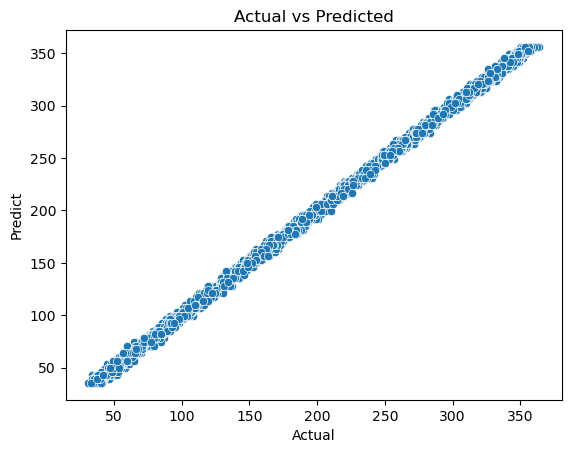

In [24]:
plt.figsize=(20,12)
plt.title("Actual vs Predicted")
plt.xticks
sns.scatterplot(data=output,x="Actual",y="Predict");

### plot boxplots

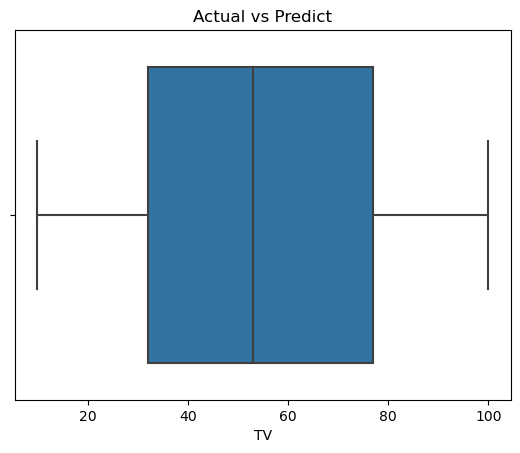

In [25]:
plt.figsize=(12,8)
plt.title("Actual vs Predict")
sns.boxplot(data=df,x="TV");
plt.show()

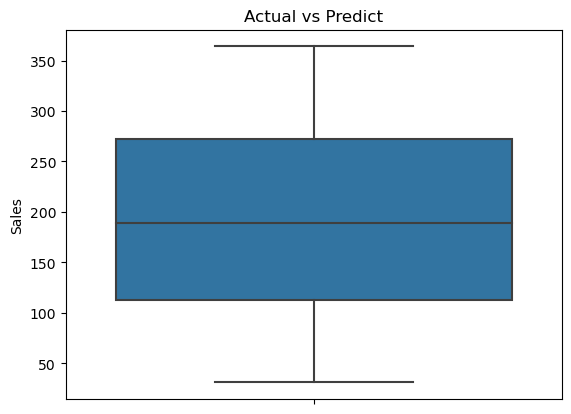

In [26]:
plt.figsize=(12,8)
plt.title("Actual vs Predict")
sns.boxplot(data=df,y="Sales");
plt.show()

In [ ]:
plt.figsize=(15,8)
sns.boxplot(data=output,x="Actual",y="Predict");
plt.show()